In [31]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display
import matplotlib.pyplot as plt
# from IPython.display import Image, display

In [32]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
#             print(dot_string)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
            
def show_stats(directory):
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    ax.add_artist(first_legend)

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)

    plt.show()
    plt.close(fig)

    
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

def box_plot(df, x, y, xlabel, ylabel, title, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
#         color = color_assignment_dict.get(strat)
        ax.box_plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.show()
    plt.close(fig)
#     return plt

In [33]:
# df_diff_nums_lfs=show_stats('../experiment_diff_num_lfs_611/')
df_diff_user_input=show_stats('../exp_613_repeated/')

In [34]:
# df_diff_nums_lfs['strat'] = df_diff_nums_lfs['strat'].str.replace('information_gain', 'decision tree')
# df_diff_nums_lfs['user_input_size'] = df_diff_nums_lfs['num_complaints'] + df_diff_nums_lfs['confirmation_cnt']
# df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['num_complaints']/df_diff_nums_lfs['user_input_size']
# df_diff_nums_lfs['complaint_ratio'] = df_diff_nums_lfs['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
# df_diff_nums_lfs['accuracy_improvement'] = df_diff_nums_lfs['new_global_accuracy']/df_diff_nums_lfs['global_accuracy']
# grouped = df_diff_nums_lfs.groupby(['strat','complaint_ratio','user_input_size','deletion_factor','num_functions']).mean()
df_diff_user_input['strat'] = df_diff_user_input['strat'].str.replace('information_gain', 'decision tree')
df_diff_user_input['user_input_size'] = df_diff_user_input['num_complaints'] + df_diff_user_input['confirmation_cnt']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['num_complaints']/df_diff_user_input['user_input_size']
df_diff_user_input['complaint_ratio'] = df_diff_user_input['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_diff_user_input['accuracy_improvement'] = df_diff_user_input['new_global_accuracy']/df_diff_user_input['global_accuracy']
# # Reset the index
# df_diff_nums_lfs = grouped.reset_index()

# unique_ratios=list(df_diff_nums_lfs['strat'].unique())
# markers=['v','o', '^','h', 'H', '$...$', 'x', '+', 'D', 'd']
# used_markers=len(unique_ratios)
# shape_assignment_dict = {k: v for k, v in zip(unique_ratios, markers[:used_markers])}

# unique_strats=list(df_diff_nums_lfs['complaint_ratio'].unique())
# colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# used_colors=len(unique_strats)
# color_assignment_dict = {k: v for k, v in zip(unique_strats, colors[:used_colors])}

line_color_assignment_dict={'naive':'g','decision tree':'r', 'brute_force': 'b'}

In [35]:
list(df_diff_user_input)

['strat',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'num_functions',
 'deletion_factor',
 'post_fix_num_funcs',
 'num_of_funcs_processed_by_algo',
 'complaint_reached_max',
 'confirm_reached_max',
 'user_input_size',
 'complaint_ratio',
 'accuracy_improvement']

In [36]:
df_diff_user_input_means = df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).mean().reset_index()
df_diff_user_input_std = df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).std().reset_index()
df_diff_user_input_size= df_diff_user_input.groupby(['strat','user_input_size','complaint_ratio','deletion_factor']).size().reset_index()

In [37]:
list(df_diff_user_input_size)

['strat', 'user_input_size', 'complaint_ratio', 'deletion_factor', 0]

In [38]:
df_diff_user_input_size.sort_values(by=[0])

,strat,user_input_size,complaint_ratio,deletion_factor,0
157,naive,320,90.00%,0.5,2
154,naive,320,70.00%,0.7,2
153,naive,320,70.00%,0.5,2
75,decision tree,320,70.00%,0.7,2
100,naive,80,10.00%,0.3,3
101,naive,80,10.00%,0.5,3
102,naive,80,10.00%,0.7,3
103,naive,80,30.00%,0.0,3
104,naive,80,30.00%,0.3,3
105,naive,80,30.00%,0.5,3


In [39]:
df_diff_user_input[(df_diff_user_input['strat']!='brute_force') &\
                                      (df_diff_user_input['deletion_factor']==0.5) &\
                      (df_diff_user_input['user_input_size']==160)].sort_values(['strat','user_input_size','complaint_ratio'])

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,user_input_size,complaint_ratio,accuracy_improvement
0,decision tree,1.357,0.720000,16,144,0.738,0.375,0.847,0.565,1348,1077,30,0.5,25,29,False,False,160,10.00%,0.765583
0,decision tree,1.781,0.347826,16,144,0.738,0.688,0.799,0.617,1348,862,30,0.5,23,29,False,False,160,10.00%,0.836043
0,decision tree,1.270,0.560000,16,144,0.738,0.500,0.819,0.643,1348,917,30,0.5,25,29,False,False,160,10.00%,0.871274
0,decision tree,1.014,0.600000,48,112,0.738,0.417,0.804,0.574,1348,1075,30,0.5,20,29,False,False,160,30.00%,0.777778
0,decision tree,1.772,0.421053,48,112,0.738,0.500,0.795,0.582,1348,782,30,0.5,19,29,False,False,160,30.00%,0.788618
0,decision tree,1.669,0.736842,48,112,0.738,0.812,0.866,0.632,1348,816,30,0.5,19,29,False,False,160,30.00%,0.856369
0,decision tree,1.537,0.875000,80,80,0.738,0.238,0.738,0.476,1348,973,30,0.5,16,29,False,False,160,50.00%,0.644986
0,decision tree,1.172,0.888889,80,80,0.738,0.400,0.787,0.517,1348,1009,30,0.5,18,29,False,False,160,50.00%,0.700542
0,decision tree,1.476,0.307692,80,80,0.738,0.750,0.938,0.609,1348,709,30,0.5,13,29,False,False,160,50.00%,0.825203
0,decision tree,1.110,1.230769,112,48,0.738,0.420,0.708,0.469,1348,922,30,0.5,13,29,False,False,160,70.00%,0.635501


In [40]:
df_diff_user_input_std[(df_diff_user_input_std['strat']!='brute_force') &\
                                      (df_diff_user_input_std['deletion_factor']==0) &\
                      (df_diff_user_input_std['user_input_size']==320)]



,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,accuracy_improvement
60,decision tree,320,10.00%,0.0,0.202850,0.545690,0.0,0.0,0.0,0.118509,0.004041,0.018903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025614
64,decision tree,320,30.00%,0.0,0.243755,0.335548,0.0,0.0,0.0,0.023671,0.000000,0.006245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008462
68,decision tree,320,50.00%,0.0,1.027330,0.640602,0.0,0.0,0.0,0.109002,0.006000,0.039000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052846
72,decision tree,320,70.00%,0.0,0.534926,0.234126,0.0,0.0,0.0,0.095657,0.068091,0.047816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064791
76,decision tree,320,90.00%,0.0,0.586964,0.619438,0.0,0.0,0.0,0.108487,0.090644,0.045431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061560
139,naive,320,10.00%,0.0,0.017776,6.657661,0.0,0.0,0.0,0.064933,0.004041,0.011533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015627
143,naive,320,30.00%,0.0,0.005196,1.726053,0.0,0.0,0.0,0.045310,0.009452,0.025697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034820
147,naive,320,50.00%,0.0,0.134280,0.982061,0.0,0.0,0.0,0.018502,0.003464,0.014012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018986
151,naive,320,70.00%,0.0,0.062405,0.982061,0.0,0.0,0.0,0.155897,0.039577,0.052849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071611
155,naive,320,90.00%,0.0,0.008888,2.378608,0.0,0.0,0.0,0.158101,0.054271,0.073078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099021


In [41]:
df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
                                      (df_diff_user_input_means['deletion_factor']==0) &\
                      (df_diff_user_input_means['user_input_size']==320)]

# df_diff_user_input_means

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,accuracy_improvement
60,decision tree,320,10.00%,0.0,5.433000,4.466667,32.0,288.0,0.738,0.697667,0.995333,0.846667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.147245
64,decision tree,320,30.00%,0.0,5.477667,5.622222,96.0,224.0,0.738,0.965333,1.000000,0.931000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.261518
68,decision tree,320,50.00%,0.0,5.275333,7.844444,160.0,160.0,0.738,0.810333,0.994000,0.896000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.214092
72,decision tree,320,70.00%,0.0,4.755333,8.355556,224.0,96.0,0.738,0.813667,0.895667,0.835667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.132340
76,decision tree,320,90.00%,0.0,3.712667,7.022222,288.0,32.0,0.738,0.761667,0.885667,0.764000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.035230
139,naive,320,10.00%,0.0,0.918000,20.800000,32.0,288.0,0.738,0.791667,0.995333,0.853000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.155827
143,naive,320,30.00%,0.0,0.937000,26.511111,96.0,224.0,0.738,0.781000,0.992667,0.840667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.139115
147,naive,320,50.00%,0.0,1.005000,26.266667,160.0,160.0,0.738,0.956333,0.998000,0.877667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.189250
151,naive,320,70.00%,0.0,0.968333,24.333333,224.0,96.0,0.738,0.805000,0.972333,0.787000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.066396
155,naive,320,90.00%,0.0,0.903000,18.133333,288.0,32.0,0.738,0.779000,0.906667,0.631333,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,0.855465


In [42]:
df_diff_user_input_runtime=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
                                      (df_diff_user_input_means['deletion_factor']==0)]
df_diff_user_input_avg_tree=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
                                      (df_diff_user_input_means['deletion_factor']==0)]
df_diff_user_input_deletion_factor=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force')&\
                                                     (df_diff_user_input_means['complaint_ratio']=='50.00%')]

In [43]:
df_diff_user_input_deletion_factor

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,accuracy_improvement
8,decision tree,40,50.00%,0.0,0.138667,1.422222,20.0,20.0,0.738,0.483333,0.933333,0.830000,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.124661
9,decision tree,40,50.00%,0.3,0.154000,1.547181,20.0,20.0,0.738,0.450000,0.900000,0.784667,1348.0,1327.333333,30.0,29.000000,29.0,0.0,0.0,1.063234
10,decision tree,40,50.00%,0.5,0.154667,0.213675,20.0,20.0,0.738,0.550000,0.866667,0.746333,1348.0,1204.333333,30.0,24.333333,29.0,0.0,0.0,1.011292
11,decision tree,40,50.00%,0.7,0.139333,0.000000,20.0,20.0,0.738,0.500000,0.866667,0.620333,1348.0,1092.666667,30.0,21.666667,29.0,0.0,0.0,0.840560
28,decision tree,80,50.00%,0.0,0.438000,2.866667,40.0,40.0,0.738,0.475000,0.925000,0.778333,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.054652
29,decision tree,80,50.00%,0.3,0.398333,1.889806,40.0,40.0,0.738,0.433333,0.825000,0.672333,1348.0,1221.000000,30.0,27.333333,29.0,0.0,0.0,0.911021
30,decision tree,80,50.00%,0.5,0.350333,0.796248,40.0,40.0,0.738,0.300000,0.808333,0.595333,1348.0,1069.000000,30.0,21.000000,29.0,0.0,0.0,0.806685
31,decision tree,80,50.00%,0.7,0.326000,0.000000,40.0,40.0,0.738,0.641667,0.766667,0.593667,1348.0,870.666667,30.0,14.666667,29.0,0.0,0.0,0.804426
48,decision tree,160,50.00%,0.0,1.380667,4.688889,80.0,80.0,0.738,0.741667,0.946000,0.844000,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.143631
49,decision tree,160,50.00%,0.3,1.276000,2.252525,80.0,80.0,0.738,0.512667,0.858000,0.684333,1348.0,1077.666667,30.0,23.333333,29.0,0.0,0.0,0.927281


In [44]:
# |after_the_fix| / |size_pre_fix| * deletion_factor op 1 

#   10 / 4 * 0.5 > 1

# The following are without brute force
###  1. fix deletion factor at 0.5, see the complaint ratio vs runtime for different user input size

`Conclusion from this: the more user complaint we have the more time spent`

In [45]:
df_diff_user_input_runtime.head()

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,accuracy_improvement
0,decision tree,40,10.00%,0.0,0.125000,0.911111,4.0,36.0,0.738,0.666667,1.000000,0.839667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.137760
4,decision tree,40,30.00%,0.0,0.172333,1.644444,12.0,28.0,0.738,0.389000,0.976333,0.795667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.078139
8,decision tree,40,50.00%,0.0,0.138667,1.422222,20.0,20.0,0.738,0.483333,0.933333,0.830000,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.124661
12,decision tree,40,70.00%,0.0,0.126667,1.533333,28.0,12.0,0.738,0.345333,0.972333,0.797667,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,1.080849
16,decision tree,40,90.00%,0.0,0.130667,1.600000,36.0,4.0,0.738,0.685333,0.750000,0.601333,1348.0,1348.0,30.0,30.0,29.0,0.0,0.0,0.814815


/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


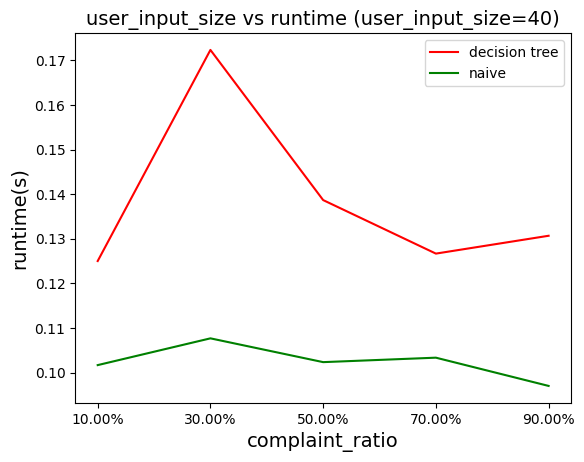

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


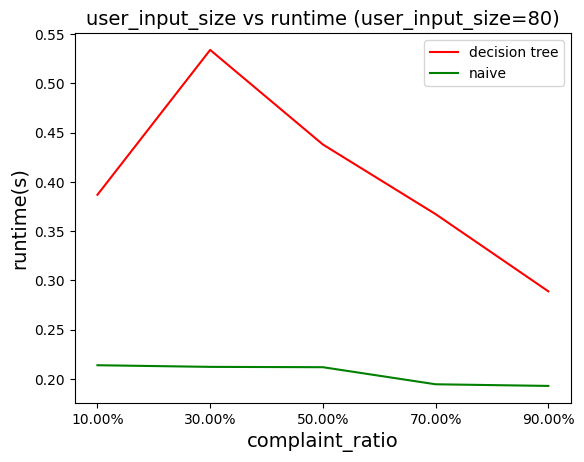

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


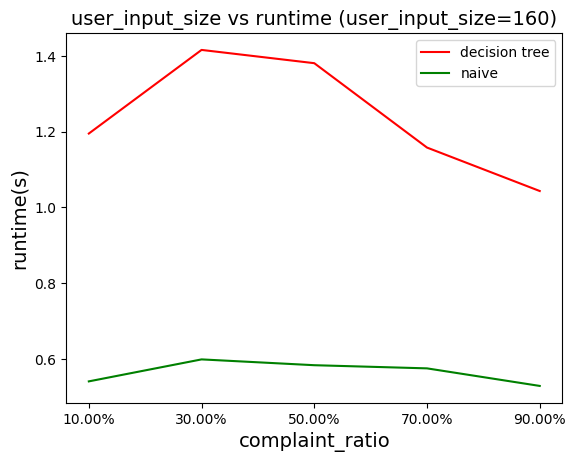

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


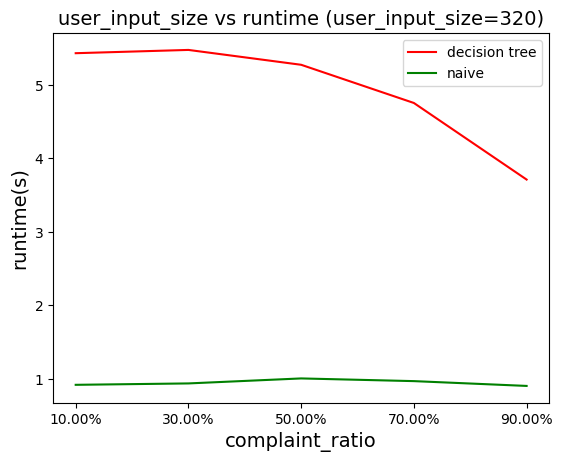

In [46]:
# for input_size in list(df_diff_user_input['user_input_size'].unique()):
#     line_plots(df_without_brute, 'deletion_factor', 'avg_tree_size_increase', 'deletion_factor', 'avg tree size increase', f'deletion_factor vs tree size increase num_func={num_func}', 
#                                 line_color_assignment_dict, 'lower center', num_func)
for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='runtime', 
               xlabel='complaint_ratio',
               ylabel='runtime(s)', 
               title=f'user_input_size vs runtime (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  2. fix deletion factor at 0 (no deletion), see the tree size increase differences for different user input

`Conclusion from this: decision tree version is much better`

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


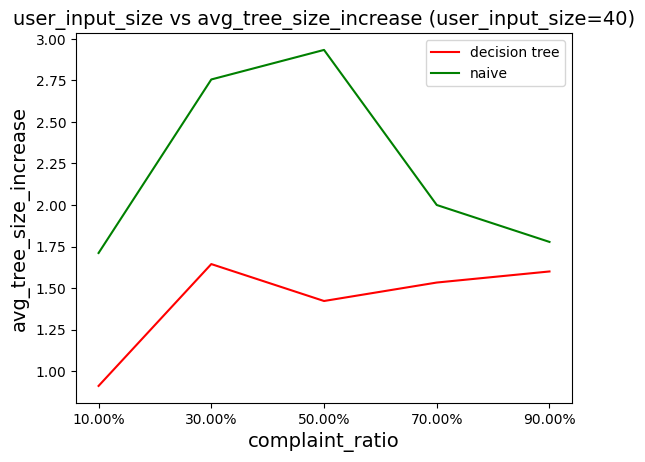

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


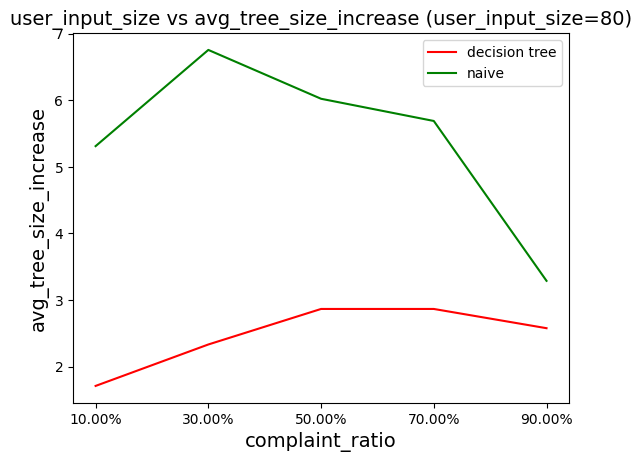

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


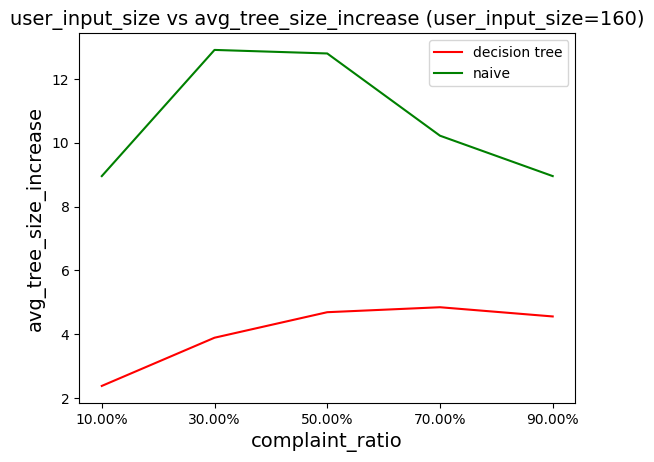

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


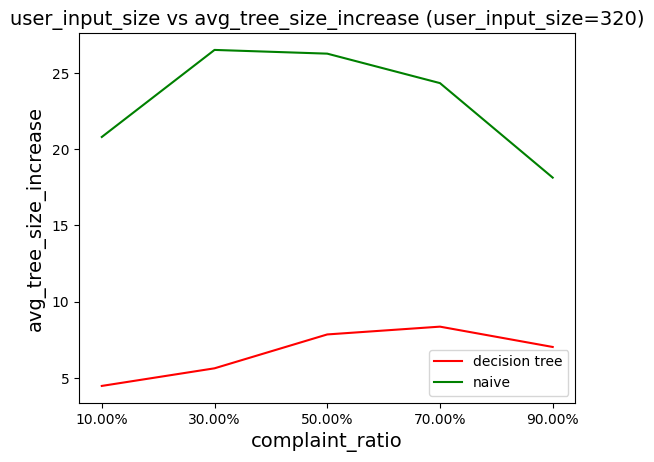

In [47]:
for input_size in list(df_diff_user_input_avg_tree['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_avg_tree, 
               x='complaint_ratio', 
               y='avg_tree_size_increase', 
               xlabel='complaint_ratio',
               ylabel='avg_tree_size_increase', 
               title=f'user_input_size vs avg_tree_size_increase (user_input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center',
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

###  3. fix complaint ratio at 50%, see the tree size increase differences for different user input

`Conclusion from this: both versions the tree sizes converge when deletion factor around 0.3`

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


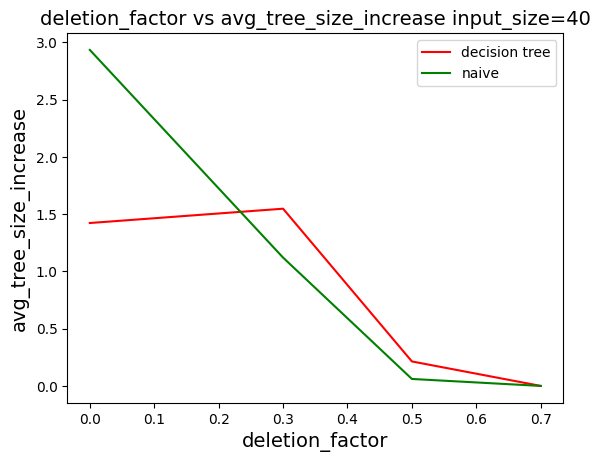

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


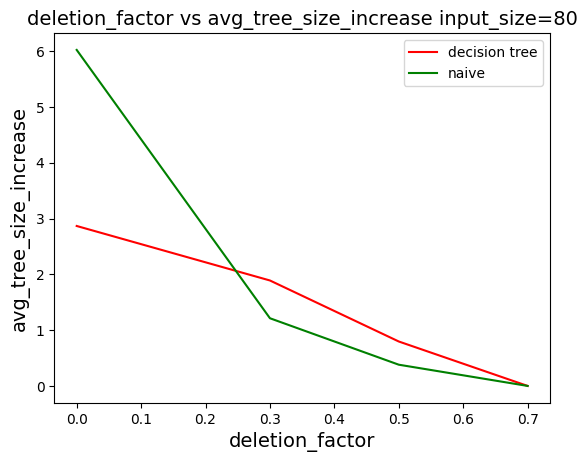

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


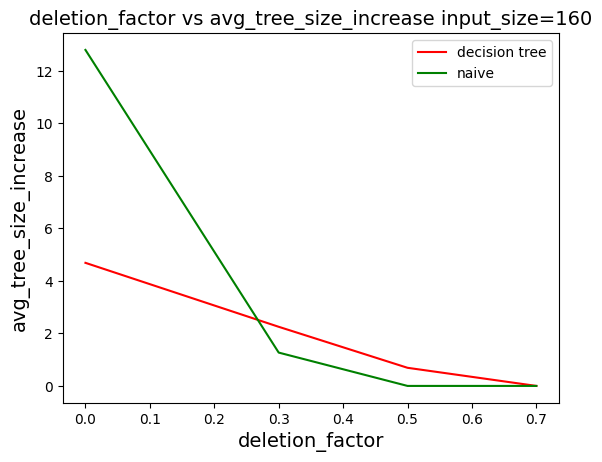

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


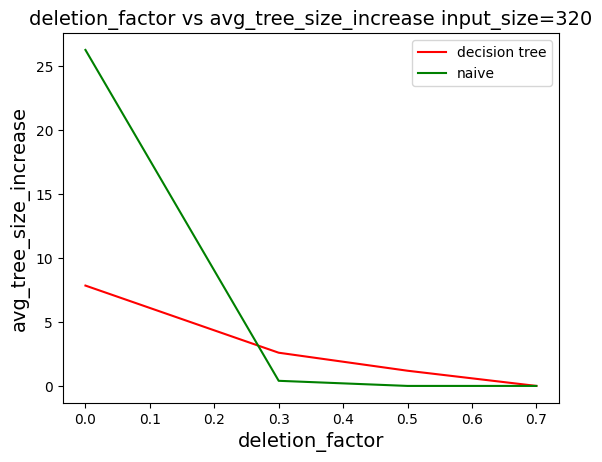

In [48]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='avg_tree_size_increase', 
               xlabel='deletion_factor',
               ylabel='avg_tree_size_increase', 
               title=f'deletion_factor vs avg_tree_size_increase input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

### 4. fix complaint ratio at 50%, see the global accuracy difference for different user input

`Conclusion from this: decision tree is performing worse than naive`

In [49]:
df_diff_user_input_deletion_factor

,strat,user_input_size,complaint_ratio,deletion_factor,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,accuracy_improvement
8,decision tree,40,50.00%,0.0,0.138667,1.422222,20.0,20.0,0.738,0.483333,0.933333,0.830000,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.124661
9,decision tree,40,50.00%,0.3,0.154000,1.547181,20.0,20.0,0.738,0.450000,0.900000,0.784667,1348.0,1327.333333,30.0,29.000000,29.0,0.0,0.0,1.063234
10,decision tree,40,50.00%,0.5,0.154667,0.213675,20.0,20.0,0.738,0.550000,0.866667,0.746333,1348.0,1204.333333,30.0,24.333333,29.0,0.0,0.0,1.011292
11,decision tree,40,50.00%,0.7,0.139333,0.000000,20.0,20.0,0.738,0.500000,0.866667,0.620333,1348.0,1092.666667,30.0,21.666667,29.0,0.0,0.0,0.840560
28,decision tree,80,50.00%,0.0,0.438000,2.866667,40.0,40.0,0.738,0.475000,0.925000,0.778333,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.054652
29,decision tree,80,50.00%,0.3,0.398333,1.889806,40.0,40.0,0.738,0.433333,0.825000,0.672333,1348.0,1221.000000,30.0,27.333333,29.0,0.0,0.0,0.911021
30,decision tree,80,50.00%,0.5,0.350333,0.796248,40.0,40.0,0.738,0.300000,0.808333,0.595333,1348.0,1069.000000,30.0,21.000000,29.0,0.0,0.0,0.806685
31,decision tree,80,50.00%,0.7,0.326000,0.000000,40.0,40.0,0.738,0.641667,0.766667,0.593667,1348.0,870.666667,30.0,14.666667,29.0,0.0,0.0,0.804426
48,decision tree,160,50.00%,0.0,1.380667,4.688889,80.0,80.0,0.738,0.741667,0.946000,0.844000,1348.0,1348.000000,30.0,30.000000,29.0,0.0,0.0,1.143631
49,decision tree,160,50.00%,0.3,1.276000,2.252525,80.0,80.0,0.738,0.512667,0.858000,0.684333,1348.0,1077.666667,30.0,23.333333,29.0,0.0,0.0,0.927281


/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


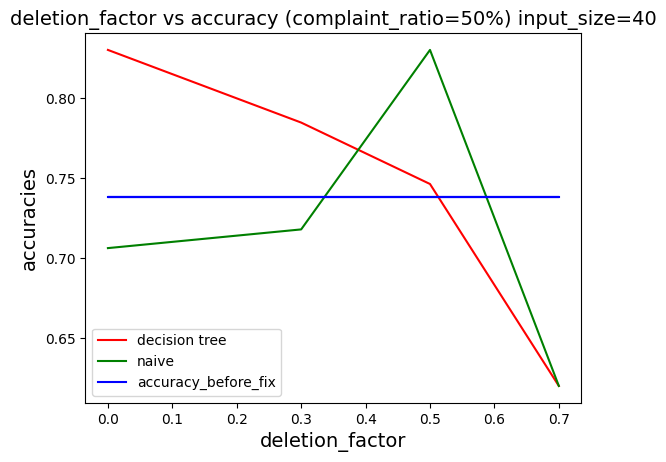

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


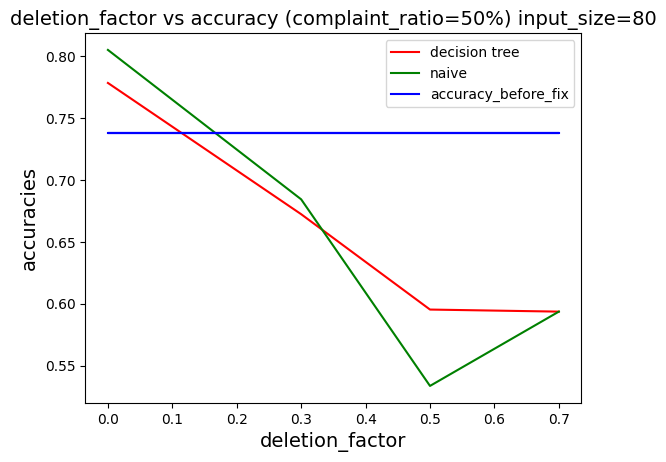

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


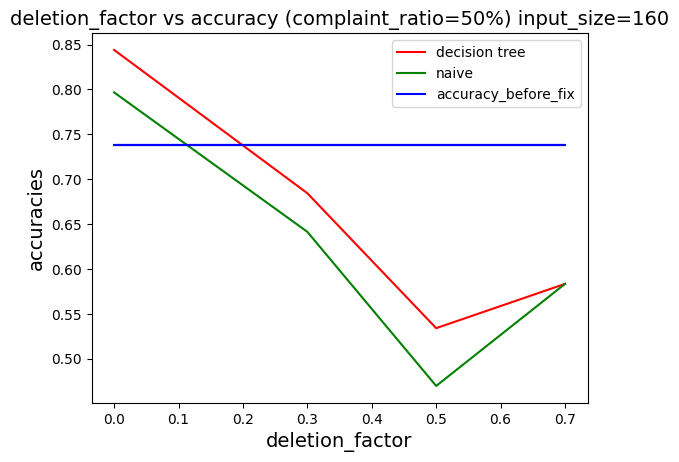

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


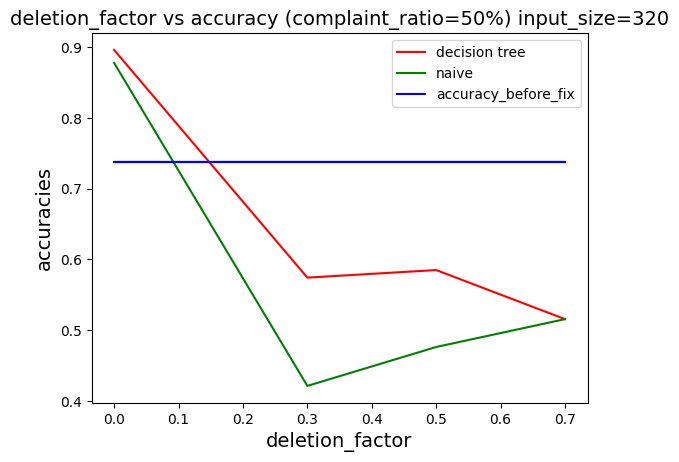

In [50]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==input_size])
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='new_global_accuracy', 
               xlabel='deletion_factor',
               ylabel='accuracies', 
               title=f'deletion_factor vs accuracy (complaint_ratio=50%) input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='accuracy',
               ylim=None)

### 5. fix complaint ratio at 50%, see the number of funcs left for different user input

`Conclusion from this: decision tree is performing worse than naive`

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


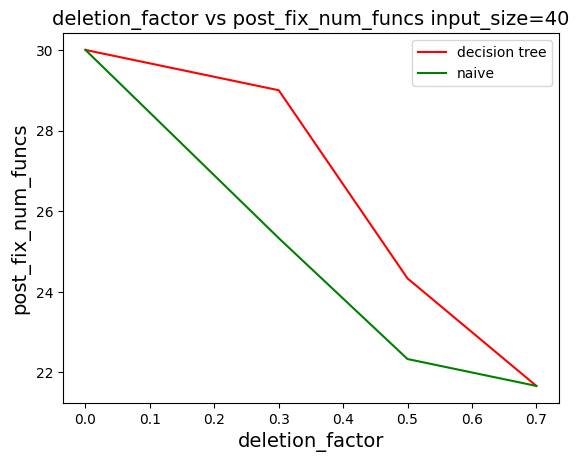

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


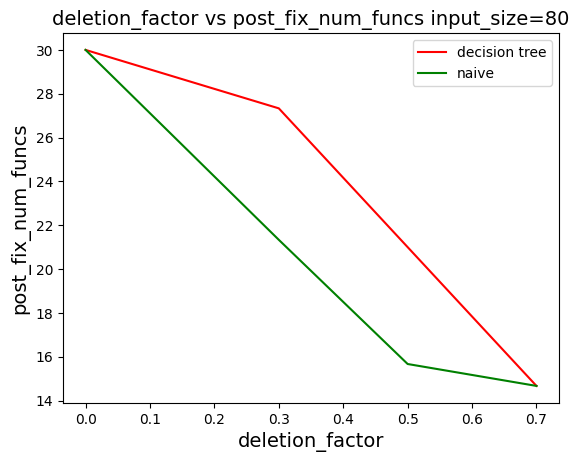

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


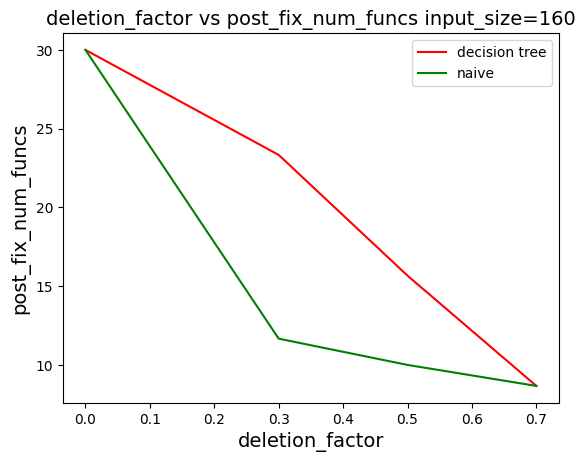

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


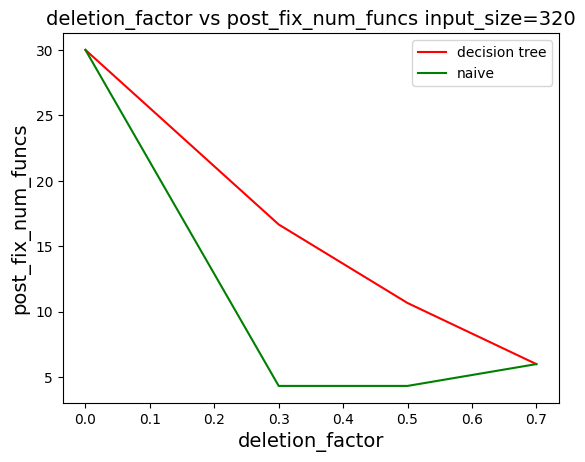

In [51]:
for input_size in list(df_diff_user_input_deletion_factor['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_deletion_factor, 
               x='deletion_factor', 
               y='post_fix_num_funcs', 
               xlabel='deletion_factor',
               ylabel='post_fix_num_funcs', 
               title=f'deletion_factor vs post_fix_num_funcs input_size={input_size}',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [52]:
# import matplotlib.pyplot as plt
# import pandas as pd

# data = {
#     'Category': ['A', 'A', 'B', 'B', 'B', 'A'],
#     'Value': [10, 15, 20, 25, 30, 35]
# }
# df = pd.DataFrame(data)

# # Create a box plot with different x-axis values
# plt.boxplot(df['Value'], positions=[1,2,3,4,5,6])

# # Add labels and title
# plt.xlabel('Category')
# plt.ylabel('Value')
# plt.title('Box Plot')

# # Display the plot
# plt.show()

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


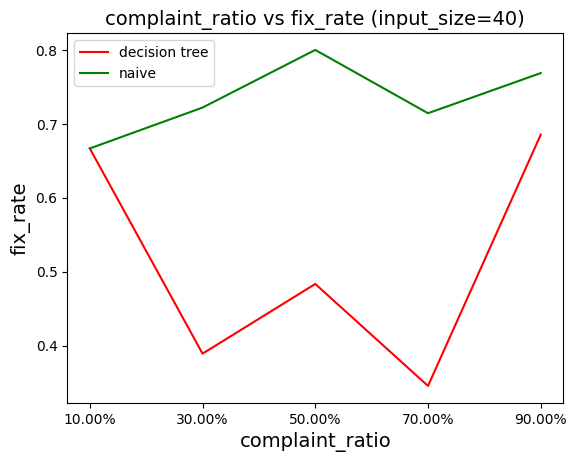

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


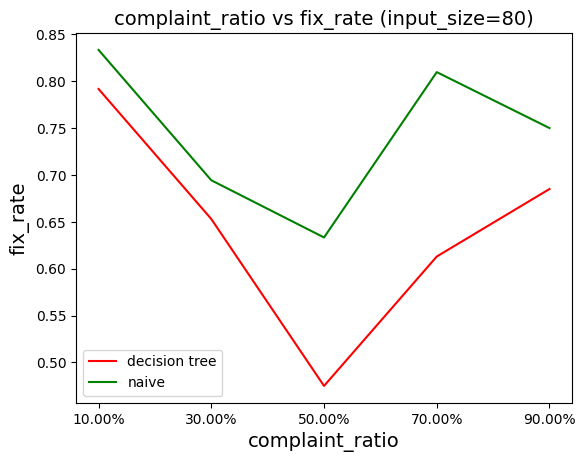

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


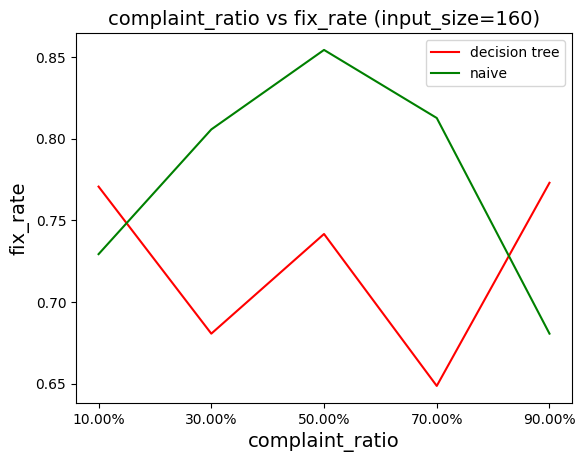

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


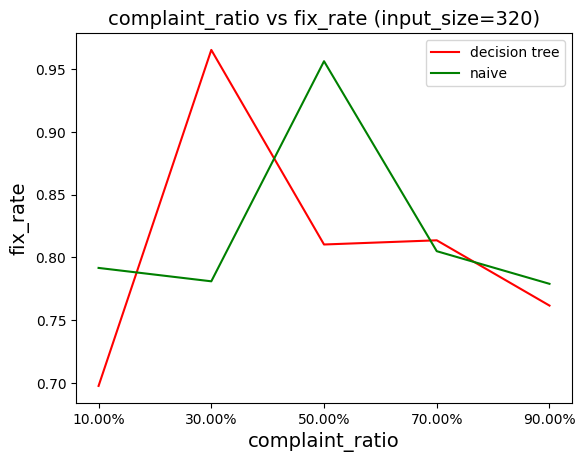

In [53]:
# df_diff_user_input_runtime=df_diff_user_input_means[(df_diff_user_input_means['strat']!='brute_force') &\
#                                       (df_diff_user_input_means['deletion_factor']==0.5)]

for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='fix_rate', 
               xlabel='complaint_ratio',
               ylabel='fix_rate', 
               title=f'complaint_ratio vs fix_rate (input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [54]:
list(df_diff_user_input_runtime)

['strat',
 'user_input_size',
 'complaint_ratio',
 'deletion_factor',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'num_functions',
 'post_fix_num_funcs',
 'num_of_funcs_processed_by_algo',
 'complaint_reached_max',
 'confirm_reached_max',
 'accuracy_improvement']

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


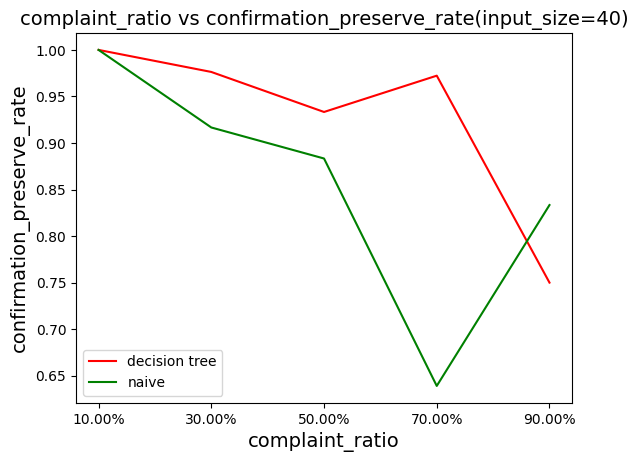

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


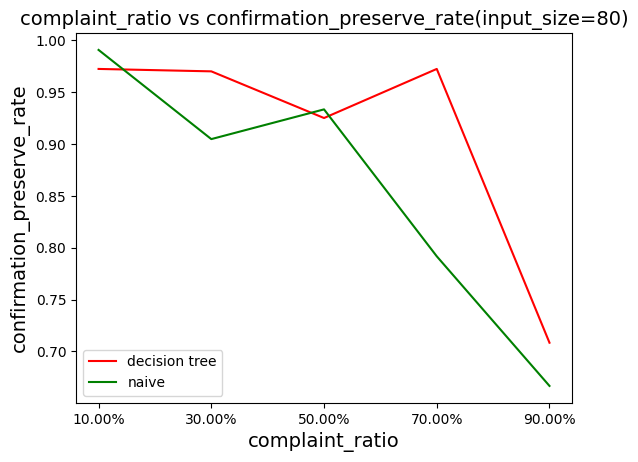

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


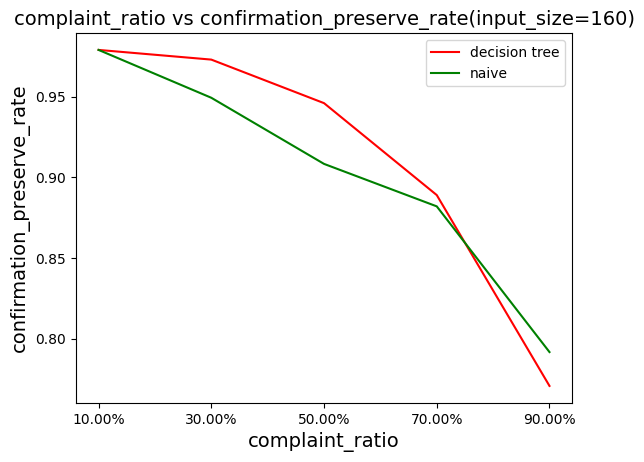

/tmp/ipykernel_23057/1102269788.py:76: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for strat, group in groups:


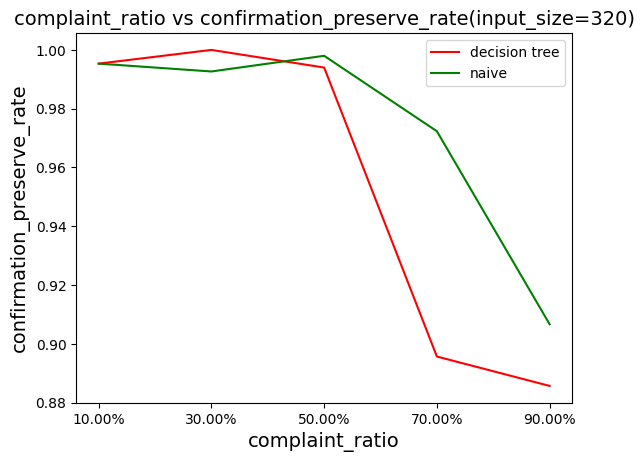

In [55]:
for input_size in list(df_diff_user_input_runtime['user_input_size'].unique()):
#     print(df_diff_user_input_deletion_factor[df_diff_user_input_deletion_factor['user_input_size']==num_func)
    line_plots(df=df_diff_user_input_runtime, 
               x='complaint_ratio', 
               y='confirm_preserve_rate', 
               xlabel='complaint_ratio',
               ylabel='confirmation_preserve_rate', 
               title=f'complaint_ratio vs confirmation_preserve_rate(input_size={input_size})',
               color_assignment_dict=line_color_assignment_dict, 
               legend_pos='lower center', 
               group_name='user_input_size',
               group_value=input_size,
               gtype='general',
               ylim=None)

In [115]:
repeats_df = show_stats('../exp_zero_deletion/')
repeats_df['input_size']=repeats_df['num_complaints']+repeats_df['confirmation_cnt']
# df.loc[(df['A'] > 3) & (df['A'] < 5), 'A'] = 10
# repeats_df.loc[(repeats_df['strat']=='information_gain') &(repeats_df['input_size']==40),'input_size']=45
# repeats_df.loc[(repeats_df['strat']=='information_gain') &(repeats_df['input_size']==80),'input_size']=85
# repeats_df.loc[(repeats_df['strat']=='information_gain') &(repeats_df['input_size']==160),'input_size']=165
# repeats_df.loc[(repeats_df['strat']=='information_gain') &(repeats_df['input_size']==320),'input_size']=325

In [116]:
repeats_df.loc[(repeats_df['strat']=='information_gain') &(repeats_df['input_size']==45)]['fix_rate']

Series([], Name: fix_rate, dtype: float64)

In [100]:
79.24/4

19.81

In [125]:
repeats_df['input_size'].unique()

array([ 40,  80, 160, 320])

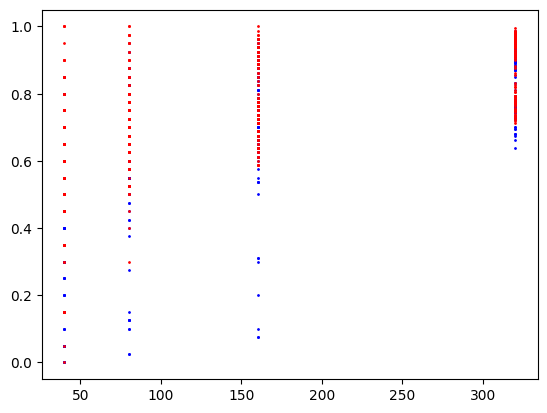

In [117]:
fig, ax = plt.subplots()
groups = repeats_df.groupby(['strat','input_size'])
# Create a scatter plot for each group based on shape and color
color_assignment_dict={'naive':'red', 'information_gain':'blue'}
for (strat, input_size), group in groups:
#     marker = shape_assignment_dict.get(strat)
    color=color_assignment_dict.get(strat)
#     print(color)
    ax.scatter(group['input_size'], group['fix_rate'], color=color, label=(strat, input_size), s=1)
    


In [118]:
repeats_df['strat'].unique()

array(['information_gain', 'naive'], dtype=object)

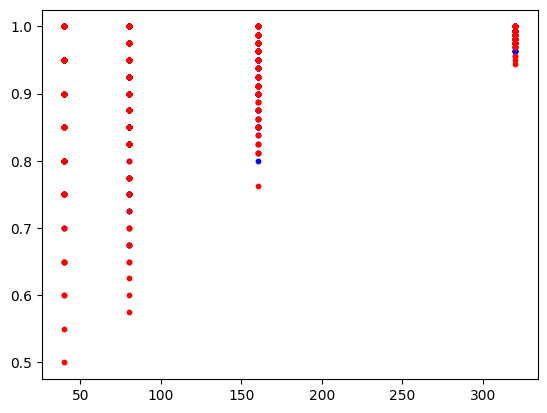

In [119]:
fig, ax = plt.subplots()
groups = repeats_df.groupby(['strat','input_size'])
# Create a scatter plot for each group based on shape and color
color_assignment_dict={'naive':'red', 'information_gain':'blue'}
for (strat, input_size), group in groups:
#     marker = shape_assignment_dict.get(strat)
    color=color_assignment_dict.get(strat)
#     print(color)
    ax.scatter(group['input_size'], group['confirm_preserve_rate'], color=color, label=(strat, input_size), s=10)


/tmp/ipykernel_23057/931719876.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (input_size, group) in groups:


40
80
160
320


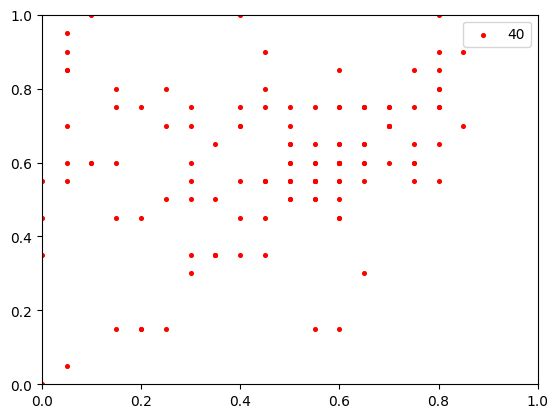

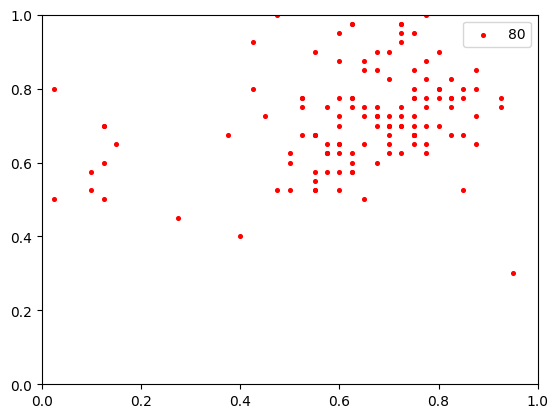

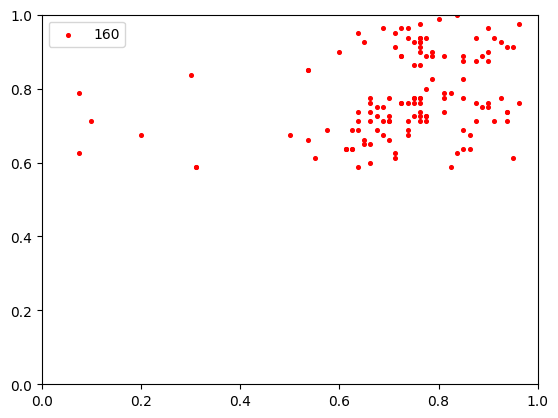

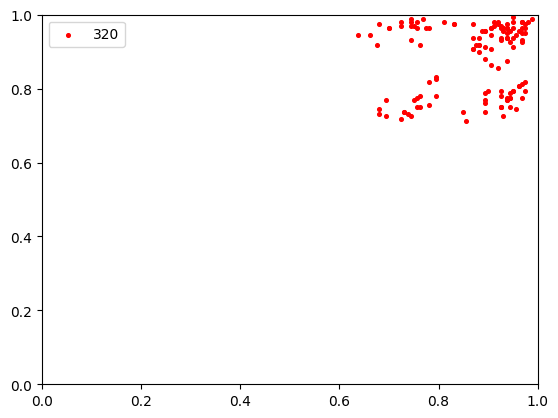

In [126]:
groups = repeats_df.groupby(['input_size'])
# Create a scatter plot for each group based on shape and color
color_assignment_dict={'naive':'red', 'information_gain':'blue'}
for (input_size, group) in groups:
    print(input_size)
#     print(group)
    fig, ax = plt.subplots()
#     marker = shape_assignment_dict.get(strat)
    color=color_assignment_dict.get(strat)
#     print(color)
    ax.scatter(group[group['strat']=='information_gain']['fix_rate'], group[group['strat']=='naive']['fix_rate'], color=color, label=(input_size), s=7)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.legend()
    plt.savefig(f'graph_pdfs/{input_size}_fvsf.png')  # Uncomment this line to save the graph as an image

